<a href="https://colab.research.google.com/github/bharathulaprasad/cs360ml/blob/main/Million_Song_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
(2002021+7)%2 + 1

1

In [132]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv (r'sample_data/YearPredictionMSD.txt', header= None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [133]:
df.shape

(365051, 91)

In [134]:
df.head

<bound method NDFrame.head of           0         1          2   ...        88         89        90
0       2001  49.94357   21.47114  ...  -1.82223  -27.46348   2.26327
1       2001  48.73215   18.42930  ...  12.04941   58.43453  26.92061
2       2001  50.95714   31.85602  ...  -0.05859   39.67068  -0.66345
3       2001  48.24750   -1.89837  ...   9.90558  199.62971  18.85382
4       2001  50.97020   42.20998  ...   7.88713   55.66926  28.74903
...      ...       ...        ...  ...       ...        ...       ...
365046  2007  29.72783 -144.00639  ...  33.40362  391.22962  47.57265
365047  2007  34.73283  -72.34405  ...   2.07928  189.60782 -33.92688
365048  2007  37.95195  -87.79448  ...  11.57037  156.96292   9.32395
365049  2006  49.80772    1.20243  ...  -3.20168   37.60868  -3.45933
365050  2009  44.91062  -33.90264  ...       NaN        NaN       NaN

[365051 rows x 91 columns]>

In [135]:
df.info

<bound method DataFrame.info of           0         1          2   ...        88         89        90
0       2001  49.94357   21.47114  ...  -1.82223  -27.46348   2.26327
1       2001  48.73215   18.42930  ...  12.04941   58.43453  26.92061
2       2001  50.95714   31.85602  ...  -0.05859   39.67068  -0.66345
3       2001  48.24750   -1.89837  ...   9.90558  199.62971  18.85382
4       2001  50.97020   42.20998  ...   7.88713   55.66926  28.74903
...      ...       ...        ...  ...       ...        ...       ...
365046  2007  29.72783 -144.00639  ...  33.40362  391.22962  47.57265
365047  2007  34.73283  -72.34405  ...   2.07928  189.60782 -33.92688
365048  2007  37.95195  -87.79448  ...  11.57037  156.96292   9.32395
365049  2006  49.80772    1.20243  ...  -3.20168   37.60868  -3.45933
365050  2009  44.91062  -33.90264  ...       NaN        NaN       NaN

[365051 rows x 91 columns]>

In [136]:
numPoints = df.count()
print (numPoints)

0     365051
1     365051
2     365051
3     365051
4     365051
       ...  
86    365050
87    365050
88    365050
89    365050
90    365050
Length: 91, dtype: int64


In [137]:
# problem we have no columns in dataset

df.rename(columns={0:'Year'}, inplace=True)
for i in range(91):
  if i<13 and i>0:
    df.rename(columns={i:'TimbreAvg'+str(i)}, inplace=True)
  else :
    df.rename(columns={i:'TimbreCovariance'+str(i-12)}, inplace=True)

df['Decade'] = df.Year.apply(lambda year : year-(year%10))

In [138]:
df.describe()

,Year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,TimbreCovariance1,TimbreCovariance2,TimbreCovariance3,TimbreCovariance4,TimbreCovariance5,TimbreCovariance6,TimbreCovariance7,TimbreCovariance8,TimbreCovariance9,TimbreCovariance10,TimbreCovariance11,TimbreCovariance12,TimbreCovariance13,TimbreCovariance14,TimbreCovariance15,TimbreCovariance16,TimbreCovariance17,TimbreCovariance18,TimbreCovariance19,TimbreCovariance20,TimbreCovariance21,TimbreCovariance22,TimbreCovariance23,TimbreCovariance24,TimbreCovariance25,TimbreCovariance26,TimbreCovariance27,...,TimbreCovariance40,TimbreCovariance41,TimbreCovariance42,TimbreCovariance43,TimbreCovariance44,TimbreCovariance45,TimbreCovariance46,TimbreCovariance47,TimbreCovariance48,TimbreCovariance49,TimbreCovariance50,TimbreCovariance51,TimbreCovariance52,TimbreCovariance53,TimbreCovariance54,TimbreCovariance55,TimbreCovariance56,TimbreCovariance57,TimbreCovariance58,TimbreCovariance59,TimbreCovariance60,TimbreCovariance61,TimbreCovariance62,TimbreCovariance63,TimbreCovariance64,TimbreCovariance65,TimbreCovariance66,TimbreCovariance67,TimbreCovariance68,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,Decade
count,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,...,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365051.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365051.000000
mean,1998.421804,43.373068,1.078984,8.770465,1.062030,-6.568052,-9.571229,-2.431430,-1.774760,3.749493,1.882169,-0.151864,2.547782,33.614917,2430.396042,1965.192962,1511.350486,909.444257,876.057162,603.572597,514.797489,393.669165,324.436958,288.060296,292.342223,43.114905,43.782555,-44.592280,-27.442472,14.304809,44.574031,5.552698,24.015837,9.957403,-4.163139,0.693908,73.178422,-52.150380,116.836316,-190.552417,...,28.704100,12.417164,1.995770,-10.145478,64.126454,105.998421,-0.026758,39.000938,-27.700072,3.319683,0.434111,-0.407030,-138.208029,-0.133286,0.661596,3.393685,27.852024,32.162986,-0.864941,-8.880342,6.468855,-27.715128,-11.857174,-21.706214,-5.554297,-22.805702,31.956851,-106.113004,27.063608,15.813193,-73.140650,41.771420,37.937611,0.342146,17.488540,-26.417345,4.398002,19.308819,1.339684,1993.412893
std,10.921412,6.100151,51.735884,35.239806,16.346638,22.872306,12.870931,14.581470,7.954925,10.577315,6.513111,4.362231,8.340600,22.246889,1744.934753,1264.657466,1094.409405,471.901005,576.802136,316.938978,307.113001,213.489426,164.641837,186.239283,153.998297,121.471810,714.276428,546.043750,217.851738,162.301852,135.014064,98.845224,71.529758,74.304098,53.344193,42.414497,108.434011,414.994480,453.023857,260.418562,...,74.916967,69.981797,83.230906,57.755511,272.651921,310.380497,266.335188,168.502478,143.694338,59.393330,48.968633,37.578133,307.952003,222.189009,128.371258,99.603112,116.312361,105.578442,36.773607,250.320912,228.855

In [139]:
np.any(np.isnan(df))

True

In [140]:
df.isnull()

,Year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,TimbreCovariance1,TimbreCovariance2,TimbreCovariance3,TimbreCovariance4,TimbreCovariance5,TimbreCovariance6,TimbreCovariance7,TimbreCovariance8,TimbreCovariance9,TimbreCovariance10,TimbreCovariance11,TimbreCovariance12,TimbreCovariance13,TimbreCovariance14,TimbreCovariance15,TimbreCovariance16,TimbreCovariance17,TimbreCovariance18,TimbreCovariance19,TimbreCovariance20,TimbreCovariance21,TimbreCovariance22,TimbreCovariance23,TimbreCovariance24,TimbreCovariance25,TimbreCovariance26,TimbreCovariance27,...,TimbreCovariance40,TimbreCovariance41,TimbreCovariance42,TimbreCovariance43,TimbreCovariance44,TimbreCovariance45,TimbreCovariance46,TimbreCovariance47,TimbreCovariance48,TimbreCovariance49,TimbreCovariance50,TimbreCovariance51,TimbreCovariance52,TimbreCovariance53,TimbreCovariance54,TimbreCovariance55,TimbreCovariance56,TimbreCovariance57,TimbreCovariance58,TimbreCovariance59,TimbreCovariance60,TimbreCovariance61,TimbreCovariance62,TimbreCovariance63,TimbreCovariance64,TimbreCovariance65,TimbreCovariance66,TimbreCovariance67,TimbreCovariance68,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,Decade
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [141]:
# This means we need to clean some data
df.dropna(inplace=True)

In [142]:
df.describe

<bound method NDFrame.describe of         Year  TimbreAvg1  ...  TimbreCovariance78  Decade
0       2001    49.94357  ...             2.26327    2000
1       2001    48.73215  ...            26.92061    2000
2       2001    50.95714  ...            -0.66345    2000
3       2001    48.24750  ...            18.85382    2000
4       2001    50.97020  ...            28.74903    2000
...      ...         ...  ...                 ...     ...
365045  2007    27.70615  ...            29.20173    2000
365046  2007    29.72783  ...            47.57265    2000
365047  2007    34.73283  ...           -33.92688    2000
365048  2007    37.95195  ...             9.32395    2000
365049  2006    49.80772  ...            -3.45933    2000

[365050 rows x 92 columns]>

In [143]:
#MinMax Scaling
df.iloc[:,1:-1] = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
df.iloc[:,1:].describe()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,TimbreCovariance1,TimbreCovariance2,TimbreCovariance3,TimbreCovariance4,TimbreCovariance5,TimbreCovariance6,TimbreCovariance7,TimbreCovariance8,TimbreCovariance9,TimbreCovariance10,TimbreCovariance11,TimbreCovariance12,TimbreCovariance13,TimbreCovariance14,TimbreCovariance15,TimbreCovariance16,TimbreCovariance17,TimbreCovariance18,TimbreCovariance19,TimbreCovariance20,TimbreCovariance21,TimbreCovariance22,TimbreCovariance23,TimbreCovariance24,TimbreCovariance25,TimbreCovariance26,TimbreCovariance27,TimbreCovariance28,...,TimbreCovariance40,TimbreCovariance41,TimbreCovariance42,TimbreCovariance43,TimbreCovariance44,TimbreCovariance45,TimbreCovariance46,TimbreCovariance47,TimbreCovariance48,TimbreCovariance49,TimbreCovariance50,TimbreCovariance51,TimbreCovariance52,TimbreCovariance53,TimbreCovariance54,TimbreCovariance55,TimbreCovariance56,TimbreCovariance57,TimbreCovariance58,TimbreCovariance59,TimbreCovariance60,TimbreCovariance61,TimbreCovariance62,TimbreCovariance63,TimbreCovariance64,TimbreCovariance65,TimbreCovariance66,TimbreCovariance67,TimbreCovariance68,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78,Decade
count,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,...,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000,365050.000000
mean,0.691289,0.468928,0.496549,0.399139,0.394992,0.358232,0.532284,0.455008,0.477418,0.426702,0.698024,0.487722,0.084383,0.036774,0.052832,0.046919,0.056396,0.051736,0.054824,0.053175,0.040319,0.092273,0.041887,0.029141,0.588077,0.354477,0.451410,0.555547,0.481044,0.445625,0.676504,0.412056,0.369846,0.404613,0.326497,0.424151,0.371553,0.596935,0.605792,0.517643,...,0.421968,0.573291,0.431696,0.734729,0.408540,0.372663,0.283238,0.362315,0.274301,0.512868,0.537413,0.440974,0.477125,0.719334,0.530646,0.365970,0.353000,0.262024,0.554628,0.639885,0.612252,0.747437,0.408538,0.498208,0.488449,0.493614,0.376884,0.631709,0.429160,0.347953,0.487975,0.359090,0.539955,0.632510,0.466464,0.600198,0.408630,0.503488,0.347733,1993.412875
std,0.105641,0.071740,0.056487,0.043202,0.051512,0.063841,0.041777,0.051175,0.038776,0.063868,0.043794,0.050052,0.056068,0.026550,0.034370,0.034381,0.029660,0.034280,0.029765,0.032113,0.022214,0.049144,0.027669,0.015703,0.024938,0.018869,0.020588,0.028163,0.025810,0.021333,0.017545,0.021786,0.016270,0.013605,0.015760,0.025771,0.018365,0.026480,0.016411,0.019287,...,0.017808,0.012535,0.016319,0.026448,0.024211,0.022169,0.015947,0.019971,0.018237,0.016003,0.023290,0.028434,0.014394,0.021669,0.017480,0.030781,0.015836,0.014828,0.021943,0.022724,0.020132,0.019182,0.022601,0.024926,0.018044,0.013511,0.026427,0.015355,0.018996,0.025412,0.019717,0.024653,0.026674,0.029827,0.016685,0.024353,0.022580,0.012433,0.024009,10.80103

Text(0.5, 1.0, 'Songs per release year')

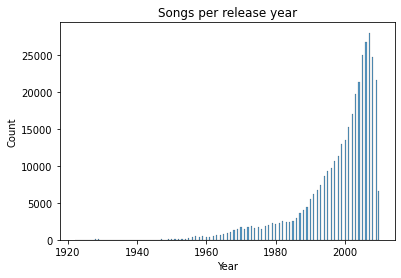

In [144]:
# explore the data 
import seaborn as sns
ax=sns.histplot(df['Year'])
plt.title("Songs per release year")

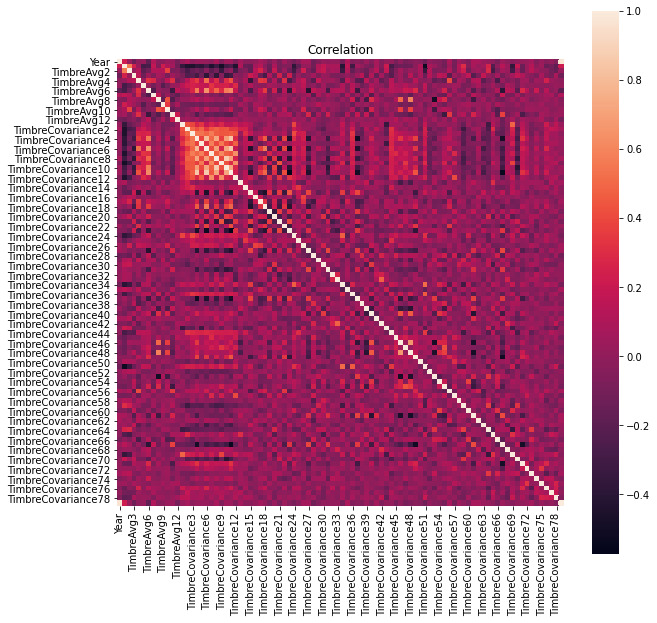

In [145]:
# correlation
corr = df.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation")
x = corr[['Decade']]
sns.heatmap(corr, square=True)
plt.show()

In [146]:
# Separate input attributes and output into different dataframes
from sklearn.decomposition import PCA
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values



In [147]:
pca = PCA(n_components=20).fit(X)
X_pca = pca.transform(X)

In [148]:
principal_components = []
samples, features = X_pca.shape
for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Decade"]    
df_pca = pd.DataFrame(np.append(X_pca, y.reshape(samples,1), axis=1), columns=cols)
df_pca["Decade"] = df_pca["Decade"].astype(int)
print("df_pca.shape = ",df_pca.shape)

df_pca.shape =  (365050, 21)


In [149]:
df_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Decade
0,-0.161903,-0.057754,0.067099,0.067881,0.021822,-0.041886,-0.020369,0.025644,-0.015343,-0.054068,-0.031510,0.045876,-0.012225,-0.021050,0.016600,0.013960,0.017896,0.006769,-0.000425,-0.012731,2000
1,-0.131070,-0.040393,-0.035399,0.012815,0.089674,-0.018032,-0.031418,-0.006771,-0.044750,-0.022058,0.025457,-0.021396,0.014300,0.000736,0.044659,0.043280,-0.010816,0.004053,0.004328,0.007240,2000
2,-0.186531,-0.021824,0.011820,0.029835,0.023817,-0.055003,0.001225,0.025121,-0.019825,-0.007780,-0.010953,-0.000647,-0.026838,0.006199,0.015355,0.011520,-0.001733,0.029728,0.017311,0.004389,2000
3,-0.118902,-0.120353,0.058383,-0.042399,0.069140,-0.002053,0.004546,0.012603,-0.007349,-0.000869,-0.030728,0.003236,0.008222,-0.007625,0.010093,0.039374,0.007348,0.012322,0.030312,-0.013691,2000
4,-0.170537,-0.040409,0.027478,0.037930,0.064636,0.008253,-0.065584,-0.015100,-0.019734,-0.027215,-0.030285,0.006130,-0.008240,-0.002984,0.042275,0.036520,-0.012613,0.003738,0.002925,-0.005023,2000


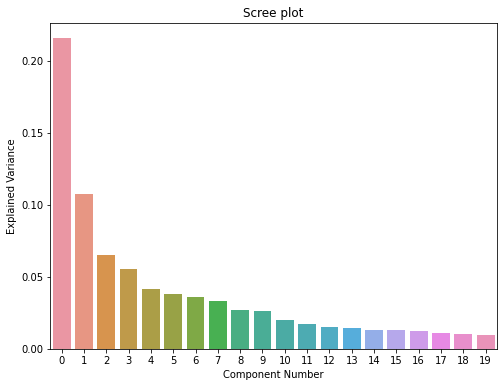

In [150]:
ind = np.arange(0, 20)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.barplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [151]:
# Separate input attributes and output into different dataframes
X = df_pca.iloc[:,0:-1]
Y = df_pca.iloc[:,-1]

# Train set 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.3, random_state= 42)


Text(0.5, 1.0, 'Songs per release decade')

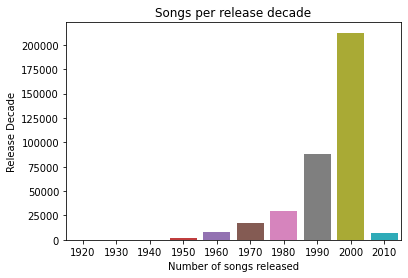

In [152]:

sns.countplot(x=df["Decade"],data=df)
plt.xlabel("Number of songs released")
plt.ylabel("Release Decade")
plt.title("Songs per release decade")

In [153]:
# Linear Regression not possible as we see data is unbalanced
#from imblearn.over_sampling import SMOTE
#sm = SMOTE()
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# High computation not possible to use.

In [154]:
# problem is most of the releases happened in 2000's.
# Linear Regression test
def modelsReg(modelName):
  name = str(modelName).split("(")[0]
  model = modelName.fit(X_train, y_train)
  ypred = np.round(model.predict(X_test),-1)
  mse = mean_squared_error(y_test, ypred)
  print("Model : " + name)
  print("MSE: " + str(mse))
  print("RMSE: " + str(math.sqrt(mse)))
  
  # save the model to disk
  filename = 'modReg'+str(modelName)[0:10]+'.sav'
  pickle.dump(model, open(filename, 'wb'))

  fig, ax = plt.subplots(figsize=(12,8))
  x_ax = range(len(X_test))
  plt.scatter(x_ax, y_test, s=3, color="blue", label="original")
  plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")  
  plt.title('Predicted vs Original values for ' + name)
  plt.legend()
  plt.show()

  
  # plot the relative distribution of the current model
  fig, ax = plt.subplots(figsize=(12,8))
  plt.hist(ypred, color='red', alpha=0.5, label='Prediction')
  plt.hist(y_test, color='darkblue', alpha=0.5, label='True year')
  plt.legend()
  plt.title('Relative distribution with ' + name)
  plt.xlabel('Relative')
  plt.ylabel('Count')
  plt.show()


Model : LinearRegression
MSE: 104.49710085376432
RMSE: 10.222382347269365


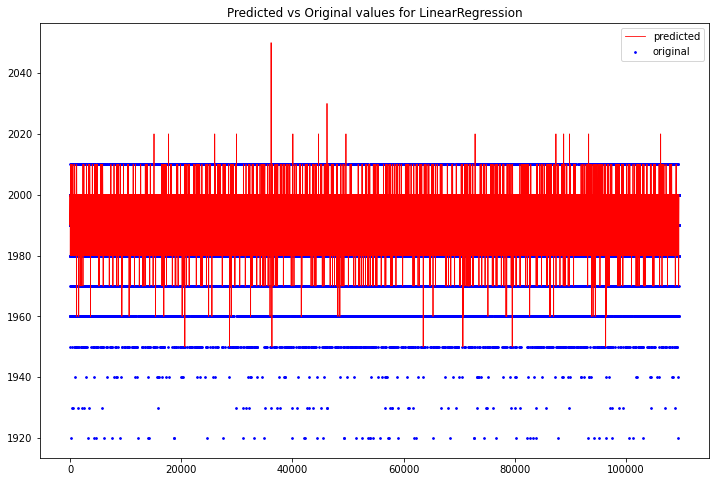

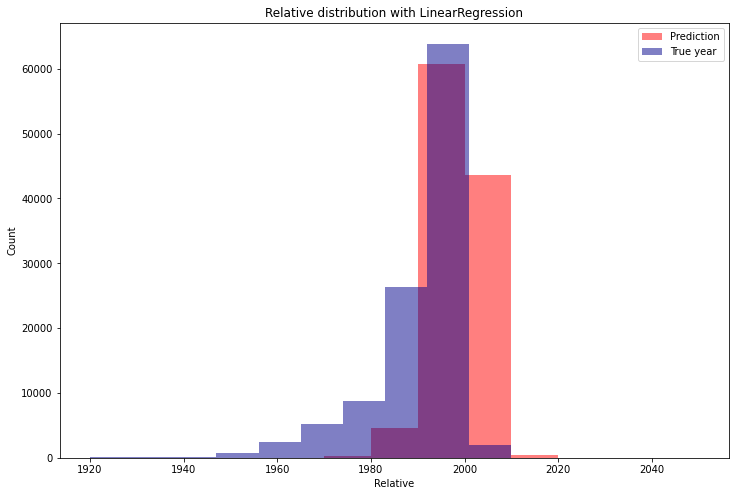

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import pickle
modelsReg(LinearRegression())

In [156]:
# i will try to implement using   Scikit-Learn as it simple..
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(X_train)
mlr.fit(X_new, y_train)
y_hat = mlr.predict(X_new)
mlr.score(X_new, y_train)


0.18149898334156933

In [157]:
mlr.intercept_

1993.4133875985676

In [158]:
mlr.coef_

array([-1.52180538,  0.59225974,  0.53050238, -2.32383907,  0.80603291,
        1.12227366,  1.06293476, -0.29324834, -2.16372308,  1.16240067,
        0.09219088,  0.42824385,  1.2498875 , -0.83516198, -0.02749376,
       -0.31067006,  0.14570474, -0.12399037, -0.99268357,  0.26122978])

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
mlr = LinearRegression()
sc_x = StandardScaler()
X_new = sc_x.fit_transform(X_test)
mlr.fit(X_new, y_test)
y_hat = mlr.predict(X_new)
mlr.score(X_new, y_test)

0.18222721881444293

In [160]:
mlr.intercept_

1993.411678765466

In [161]:
mlr.coef_

array([-1.49846966,  0.57955165,  0.54218256, -2.34289875,  0.90090298,
        1.13216221,  1.02218625, -0.25845457, -2.21661649,  1.11892855,
        0.12722601,  0.48512494,  1.24520103, -0.79895487, -0.00855941,
       -0.30012921,  0.17537885, -0.13783878, -0.9610364 ,  0.3136624 ])

In [162]:
# We can see both are very close to each other.
# No time to investigate more, so i submit